In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd




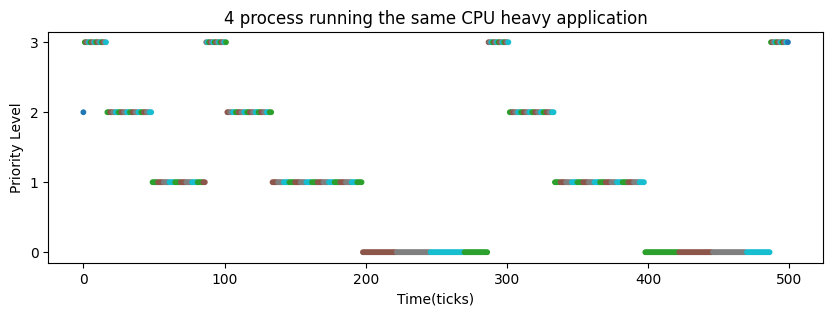

In [25]:
# Load data from the file
# Assuming your data is in a file named "data.txt" and is separated by whitespace
data = pd.read_csv("./output/test1.out", sep='\s+', header=None, names=['id', 'level'])

# Extract the x-axis index (time order)
data['x_index'] = np.arange(len(data))

fig, ax = plt.subplots(figsize=(10,3))

# Define a color map to use for different IDs
cmap = plt.get_cmap('tab10')  # A color map with 10 colors

# Plot the data
scatter = ax.scatter(data['x_index'], data['level'], c=data['id'], cmap=cmap, s=10)

# Customize the plot
ax.set_yticks([0, 1, 2, 3])  # Set y-axis ticks to represent levels 0, 1, 2, 3
ax.set_xlabel('Time(ticks)')  # Label for the x-axis
ax.set_ylabel('Priority Level')  # Label for the y-axis
ax.set_title('4 process running the same CPU heavy application')
# Add a colorbar to show the ID mapping
# cbar = plt.colorbar(scatter, ax=ax)
# cbar.set_label('ID')

# Show the plot
plt.show()

# Create a scatter plot


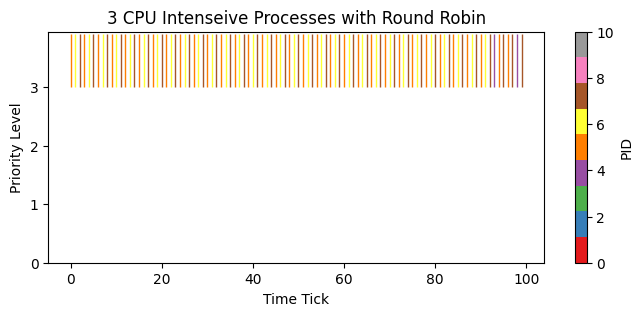

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load data from the file
# Assuming your data is in a file named "data.txt" and is separated by whitespace
data = pd.read_csv("output/test1_rr.out", sep='\s+', header=None, names=['id', 'level'])

# Extract the x-axis index (time order)
data['x_index'] = np.arange(len(data))

# Create a plot
fig, ax = plt.subplots(figsize = (8,3))

# Define a color map to use for different IDs
cmap = plt.get_cmap('Set1')  # A color map with 10 colors


# Plot vertical lines (sticks)
for i in range(len(data)):
    # Get the x coordinate (time order), the level, and the ID for the current row
    x = data['x_index'][i]
    level = data['level'][i]
    # Plot a vertical line (stick) for the current row
    ax.vlines(x, ymin=level, ymax=level + 0.9, color=cmap(data['id'][i] % cmap.N), linewidth=1)

# Customize the plot
ax.set_yticks([0, 1, 2, 3])  # Set y-axis ticks to represent levels 0, 1, 2, 3
ax.set_xlabel('Time Tick')  # Label for the x-axis
ax.set_ylabel('Priority Level')  # Label for the y-axis
ax.set_title('3 CPU Intenseive Processes with Round Robin')
# Create a color bar to show the ID mapping
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(0, 10))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('PID')
plt.savefig("test1_rr.png", format='png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


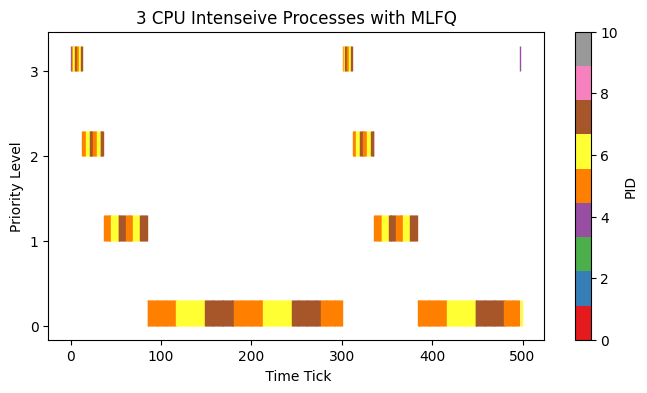

In [67]:


# Load data from the file
# Assuming your data is in a file named "data.txt" and is separated by whitespace
data = pd.read_csv("output/test1_mlfq.out", sep='\s+', header=None, names=['id', 'level'])

# Extract the x-axis index (time order)
data['x_index'] = np.arange(len(data))

# Create a plot
fig, ax = plt.subplots(figsize = (8,4))

# Define a color map to use for different IDs
cmap = plt.get_cmap('Set1')  # A color map with 10 colors


# Plot vertical lines (sticks)
for i in range(len(data)):
    # Get the x coordinate (time order), the level, and the ID for the current row
    x = data['x_index'][i]
    level = data['level'][i]
    # Plot a vertical line (stick) for the current row
    ax.vlines(x, ymin=level, ymax=level + 0.3, color=cmap(data['id'][i] % cmap.N), linewidth=1)

# Customize the plot
ax.set_yticks([0, 1, 2, 3])  # Set y-axis ticks to represent levels 0, 1, 2, 3
ax.set_xlabel(' Time Tick')  # Label for the x-axis
ax.set_ylabel('Priority Level')  # Label for the y-axis
ax.set_title('3 CPU Intenseive Processes with MLFQ')
# Create a color bar to show the ID mapping
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(0, 10))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('PID')
plt.savefig("test1_mlfq.png", format='png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


In [55]:
import matplotlib.pyplot as plt

def parse_data(filepath):
    epoch_data = {}
    current_epoch = None
    interactive_pids = set()
    
    with open(filepath, 'r') as file:
        for line in file:
            line = line.strip()
            if line.startswith('EPOCH'):
                current_epoch = int(line.split()[1])
                
                if len(line.split()) > 2:
                    continue
                epoch_data[current_epoch] = {'interactive': [], 'cpu_intense': []}
                interactive_pids = set()
            elif line.startswith('interactive process'):
                pid = int(line.split(': ')[1])
                interactive_pids.add(pid)
            elif line.startswith('process'):
                parts = line.split(', run for ')
                pid = int(parts[0].split()[1])
                ticks = int(parts[1].split()[0])
                if pid in interactive_pids:
                    epoch_data[current_epoch]['interactive'].append(ticks)
                else:
                    epoch_data[current_epoch]['cpu_intense'].append(ticks)

    
    return epoch_data

def calculate_averages(epoch_data):
    interactive_averages = []
    cpu_intense_averages = []
    
    for epoch in sorted(epoch_data.keys()):
        interactive_times = epoch_data[epoch]['interactive']
        cpu_intense_times = epoch_data[epoch]['cpu_intense']
        
        if interactive_times:
            interactive_avg = sum(interactive_times) / len(interactive_times)
        else:
            interactive_avg = 0
        
        if cpu_intense_times:
            cpu_intense_avg = sum(cpu_intense_times) / len(cpu_intense_times)
        else:
            cpu_intense_avg = 0
            
        interactive_averages.append(interactive_avg)
        cpu_intense_averages.append(cpu_intense_avg)
    
    return interactive_averages, cpu_intense_averages

def plot_data(interactive_averages, cpu_intense_averages, x_ticks, scheduler, save_path = None):
    epochs = list(range(len(interactive_averages)))
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, interactive_averages, label='Interactive Processes', marker='o')
    plt.plot(epochs, cpu_intense_averages, label='CPU Intensive Processes', marker='x')
    plt.xlabel('number of CPU-intense processes')
    plt.ylabel('Average Running Time (ticks)')
    plt.title('Average Process Running Time on' + scheduler)
    plt.xticks(epochs, x_ticks)  # Set x-ticks to show epoch numbers
    plt.legend()
    plt.grid(True)
    if save_path:
        plt.savefig(save_path, format='png', dpi=300, bbox_inches='tight')
    plt.show()




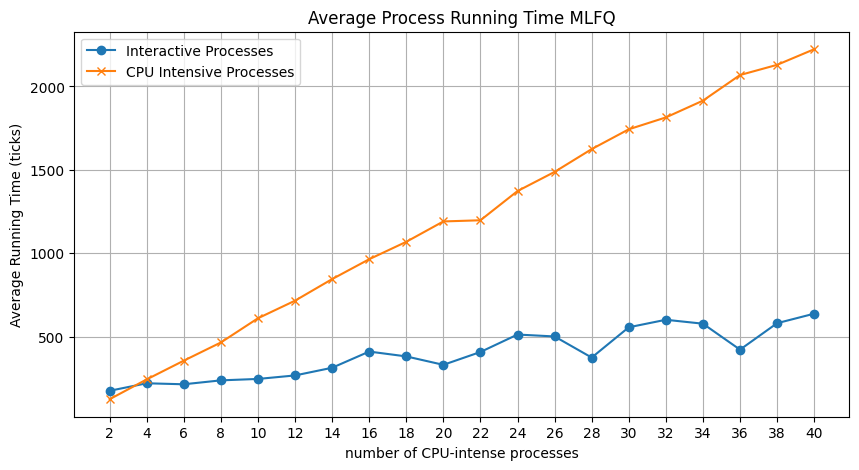

In [57]:
# Example usage
filepath = 'output/test2_mlfq.out'
data = parse_data(filepath)
interactive_avg, cpu_intense_avg = calculate_averages(data)
plot_data(interactive_avg, cpu_intense_avg, list(data.keys()), "MLFQ", "test2_mlfq.png")



In [ ]:
filepath = 'output/test2_rr.out'
data = parse_data(filepath)
interactive_avg, cpu_intense_avg = calculate_averages(data)
plot_data(interactive_avg, cpu_intense_avg, list(data.keys()), "Round Robin")

In [36]:
list(data.keys())

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40]